In [108]:
import pandas as pd
import plotly

In [109]:
# 金網フィルター流量-圧力損失の参照サイト https://www.kwn.co.jp/engineering/filter/ef_03.html
# 平織のデータ読み込み
df_pw = pd.read_csv('PlainWeave.csv')
# 綾織のデータ読み込み
df_tw = pd.read_csv('TwilledWeave.csv')
# 平畳織のデータ読み込み
df_pdw = pd.read_csv('PlainDutchWeave.csv')
# 綾畳織のデータ読み込み
df_tdw = pd.read_csv('TwilledDutchWeave.csv')

In [110]:
# 物性値の読み込み
df_properties = pd.read_csv('FluidProperties.csv')

In [111]:
# 平織の種類数
pw_rows = len(df_pw)
# 綾織の種類数
tw_rows = len(df_tw)
# 平畳織の種類数
pdw_rows = len(df_pdw)
# 綾畳織の種類数
tdw_rows = len(df_tdw)

In [112]:
# 水の物性値を代入
water_myu = df_properties['myu'][0]
water_rho = df_properties['rho'][0]
# 溶融樹脂の物性値を代入
melt_resin_myu = df_properties['myu'][1]
melt_resin_rho = df_properties['rho'][1]

In [113]:
# 計算する流体速度のリスト
v_list = []
for i in range(1,101):
    # L/min/cm2 を m/s に変換
    v = 0.1 * i / 6.0
    # リストに追加
    v_list.append(v)

In [114]:
# 圧力損失を計算する関数
def calc_pressure_drop(velocity,myu,rho,alpha,beta):
    pressure_drop = alpha * myu * velocity + beta * rho * velocity * velocity
    return pressure_drop

In [115]:
# 空のDataFrameを用意
df_water_plain = pd.DataFrame()
# DataFrameに計算する速度リストを追加
df_water_plain['velocity'] = v_list
# velocityカラムをインデックスに指定
df_water_plain.set_index("velocity", inplace=True)

# 水の圧力損失計算
myu = water_myu
rho = water_rho
# 平織の圧力損失計算
for i in range(pw_rows -1):
    pw_list = []
    alpha = df_pw['alpha'][i]
    beta = df_pw['beta'][i]
    for value in v_list:
        pressure_drop = calc_pressure_drop(value,myu,rho,alpha,beta)
        pw_list.append(pressure_drop)
        if value > 1.666:
            df_water_plain['pw' + str(i+1)] = pw_list

# 平畳織の圧力損失計算
for i in range(tw_rows -1):
    pdw_list = []
    alpha = df_pdw['alpha'][i]
    beta = df_pdw['beta'][i]
    for value in v_list:
        pressure_drop = calc_pressure_drop(value,myu,rho,alpha,beta)
        pdw_list.append(pressure_drop)
        if value > 1.666:
            df_water_plain['pdw' + str(i+1)] = pdw_list

In [116]:
# 空のDataFrameを用意
df_water_twilled = pd.DataFrame()
# DataFrameに計算する速度リストを追加
df_water_twilled['velocity'] = v_list
# velocityカラムをインデックスに指定
df_water_twilled.set_index("velocity", inplace=True)

# 水の圧力損失計算
myu = water_myu
rho = water_rho

# 綾織の圧力損失計算
for i in range(tw_rows -1):
    tw_list = []
    alpha = df_tw['alpha'][i]
    beta = df_tw['beta'][i]
    for value in v_list:
        pressure_drop = calc_pressure_drop(value,myu,rho,alpha,beta)
        tw_list.append(pressure_drop)
        if value > 1.666:
            df_water_twilled['tw' + str(i+1)] = tw_list

# 綾畳織の圧力損失計算
for i in range(tw_rows -1):
    tdw_list = []
    alpha = df_tdw['alpha'][i]
    beta = df_tdw['beta'][i]
    for value in v_list:
        pressure_drop = calc_pressure_drop(value,myu,rho,alpha,beta)
        tdw_list.append(pressure_drop)
        if value > 1.666:
            df_water_twilled['tdw' + str(i+1)] = tdw_list

In [117]:
# 空のDataFrameを用意
df_resin_plain = pd.DataFrame()
# DataFrameに計算する速度リストを追加
df_resin_plain['velocity'] = v_list
# velocityカラムをインデックスに指定
df_resin_plain.set_index("velocity", inplace=True)

# 水の圧力損失計算
myu = melt_resin_myu
rho = melt_resin_rho
# 平織の圧力損失計算
for i in range(pw_rows -1):
    pw_list = []
    alpha = df_pw['alpha'][i]
    beta = df_pw['beta'][i]
    for value in v_list:
        pressure_drop = calc_pressure_drop(value,myu,rho,alpha,beta)
        pw_list.append(pressure_drop)
        if value > 1.666:
            df_resin_plain['pw' + str(i+1)] = pw_list

# 平畳織の圧力損失計算
for i in range(tw_rows -1):
    pdw_list = []
    alpha = df_pdw['alpha'][i]
    beta = df_pdw['beta'][i]
    for value in v_list:
        pressure_drop = calc_pressure_drop(value,myu,rho,alpha,beta)
        pdw_list.append(pressure_drop)
        if value > 1.666:
            df_resin_plain['pdw' + str(i+1)] = pdw_list

In [118]:
# 空のDataFrameを用意
df_resin_twilled = pd.DataFrame()
# DataFrameに計算する速度リストを追加
df_resin_twilled['velocity'] = v_list
# velocityカラムをインデックスに指定
df_resin_twilled.set_index("velocity", inplace=True)

# 水の圧力損失計算
myu = melt_resin_myu
rho = melt_resin_rho

# 綾織の圧力損失計算
for i in range(tw_rows -1):
    tw_list = []
    alpha = df_tw['alpha'][i]
    beta = df_tw['beta'][i]
    for value in v_list:
        pressure_drop = calc_pressure_drop(value,myu,rho,alpha,beta)
        tw_list.append(pressure_drop)
        if value > 1.666:
            df_resin_twilled['tw' + str(i+1)] = tw_list
            
# 綾畳織の圧力損失計算
for i in range(tw_rows -1):
    tdw_list = []
    alpha = df_tdw['alpha'][i]
    beta = df_tdw['beta'][i]
    for value in v_list:
        pressure_drop = calc_pressure_drop(value,myu,rho,alpha,beta)
        tdw_list.append(pressure_drop)
        if value > 1.666:
            df_resin_twilled['tdw' + str(i+1)] = tdw_list

In [119]:
df_water_plain

,pw1,pw2,pw3,pw4,pw5,pw6,pdw1,pdw2,pdw3,pdw4,pdw5
velocity,,,,,,,,,,,
0.016667,1.827026,2.818956,3.361656,5.757856,7.987056,8.702611,15.428844,30.748778,29.392222,38.07,44.026444
0.033333,4.165162,6.199022,7.334422,12.376822,17.085222,18.277444,35.596578,68.553111,64.128889,82.14,93.941778
0.050000,7.014410,10.140200,11.918300,19.856900,27.294500,28.724500,60.503200,113.413000,104.210000,132.21,149.746000
0.066667,10.374769,14.642489,17.113289,28.198089,38.614889,40.043778,90.148711,165.328444,149.635556,188.28,211.439111
0.083333,14.246239,19.705889,22.919389,37.400389,51.046389,52.235278,124.533111,224.299444,200.405556,250.35,279.021111
...,...,...,...,...,...,...,...,...,...,...,...
1.600000,2506.061120,2829.286400,3109.385600,4479.420800,5833.424000,4812.784000,23090.502400,35125.216000,27192.320000,31014.72,31079.872000
1.616667,2556.954812,2885.972022,3171.413922,4567.845322,5948.077722,4905.219944,23560.864578,35833.298111,27734.778889,31628.79,31689.231778
1.633333,2608.359616,2943.218756,3234.053356,4657.130956,6063.842556,4998.528111,24035.965644,36548.435778,28282.582222,32248.86,32304.480444


In [120]:
df_water_twilled

,tw1,tw2,tw3,tw4,tw5,tdw1,tdw2,tdw3,tdw4,tdw5
velocity,,,,,,,,,,
0.016667,14.917722,24.750778,21.052111,33.312222,43.543667,165.816444,327.54,448.477778,1150.763333,1540.744444
0.033333,30.779889,50.907111,43.126444,68.118889,88.670667,374.021778,685.58,925.511111,2335.193333,3106.877778
0.050000,47.586500,78.469000,66.223000,104.420000,135.381000,624.616000,1074.12,1431.100000,3553.290000,4698.400000
0.066667,65.337556,107.436444,90.341778,142.215556,183.674667,917.599111,1493.16,1965.244444,4805.053333,6315.311111
0.083333,84.033056,137.809444,115.482778,181.505556,233.551667,1252.971111,1942.70,2527.944444,6090.483333,7957.611111
...,...,...,...,...,...,...,...,...,...,...
1.600000,5738.768000,8785.408000,6682.336000,10012.640000,11400.192000,209211.712000,170523.84,173267.200000,263993.280000,263684.800000
1.616667,5844.352389,8945.092111,6801.521444,10189.418889,11595.735667,213446.861778,173779.38,176457.011111,268376.043333,267662.877778
1.633333,5950.881222,9106.181778,6921.729111,10367.692222,11792.862667,217724.400444,177065.42,179675.377778,272792.473333,271666.344444


In [121]:
df_resin_plain

,pw1,pw2,pw3,pw4,pw5,pw6,pdw1,pdw2,pdw3,pdw4,pdw5
velocity,,,,,,,,,,,
0.016667,3.920836e+05,6.333337e+05,7.625004e+05,1.329167e+06,1.854167e+06,2.062501e+06,3.258336e+06,6.791671e+06,6.666670e+06,8750003.6,1.025000e+07
0.033333,7.841679e+05,1.266668e+06,1.525001e+06,2.658335e+06,3.708336e+06,4.125002e+06,6.516678e+06,1.358335e+07,1.333335e+07,17500014.4,2.050001e+07
0.050000,1.176253e+06,1.900003e+06,2.287503e+06,3.987505e+06,5.562506e+06,6.187505e+06,9.775026e+06,2.037504e+07,2.000003e+07,26250032.4,3.075003e+07
0.066667,1.568338e+06,2.533339e+06,3.050006e+06,5.316675e+06,7.416677e+06,8.250008e+06,1.303338e+07,2.716673e+07,2.666672e+07,35000057.6,4.100006e+07
0.083333,1.960424e+06,3.166675e+06,3.812509e+06,6.645846e+06,9.270850e+06,1.031251e+07,1.629174e+07,3.395844e+07,3.333341e+07,43750090.0,5.125009e+07
...,...,...,...,...,...,...,...,...,...,...,...
1.600000,3.764283e+07,6.080310e+07,7.320338e+07,1.276048e+08,1.780061e+08,1.980048e+08,3.128262e+08,6.520390e+08,6.400296e+08,840033177.6,9.840326e+08
1.616667,3.803497e+07,6.143650e+07,7.396595e+07,1.289340e+08,1.798604e+08,2.000674e+08,3.160851e+08,6.588315e+08,6.466968e+08,848783872.4,9.942832e+08
1.633333,3.842711e+07,6.206990e+07,7.472852e+07,1.302633e+08,1.817147e+08,2.021300e+08,3.193440e+08,6.656240e+08,6.533641e+08,857534574.4,1.004534e+09


In [122]:
df_resin_twilled

,tw1,tw2,tw3,tw4,tw5,tdw1,tdw2,tdw3,tdw4,tdw5
velocity,,,,,,,,,,
0.016667,3.604167e+06,6.000001e+06,5.125001e+06,8.125001e+06,1.066667e+07,3.608336e+07,7.791668e+07,1.083334e+08,2.829167e+08,3.812500e+08
0.033333,7.208336e+06,1.200000e+07,1.025000e+07,1.625000e+07,2.133334e+07,7.216677e+07,1.558334e+08,2.166667e+08,5.658334e+08,7.625001e+08
0.050000,1.081251e+07,1.800001e+07,1.537501e+07,2.437501e+07,3.200001e+07,1.082502e+08,2.337502e+08,3.250002e+08,8.487502e+08,1.143750e+09
0.066667,1.441668e+07,2.400001e+07,2.050001e+07,3.250001e+07,4.266668e+07,1.443337e+08,3.116670e+08,4.333336e+08,1.131667e+09,1.525000e+09
0.083333,1.802085e+07,3.000002e+07,2.562502e+07,4.062502e+07,5.333336e+07,1.804173e+08,3.895838e+08,5.416671e+08,1.414584e+09,1.906250e+09
...,...,...,...,...,...,...,...,...,...,...
1.600000,3.460052e+08,5.760078e+08,4.920057e+08,7.800083e+08,1.024009e+09,3.464234e+09,7.480169e+09,1.040016e+10,2.716019e+10,3.660014e+10
1.616667,3.496095e+08,5.820079e+08,4.971308e+08,7.881334e+08,1.034676e+09,3.500323e+09,7.558089e+09,1.050849e+10,2.744311e+10,3.698139e+10
1.633333,3.532138e+08,5.880081e+08,5.022559e+08,7.962586e+08,1.045342e+09,3.536411e+09,7.636009e+09,1.061683e+10,2.772603e+10,3.736265e+10


<AxesSubplot:xlabel='Velocity [m/s]', ylabel='Pressure Drop [Pa]'>

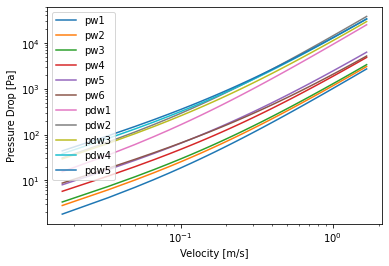

In [129]:
df_water_plain.plot(loglog=True,xlabel='Velocity [m/s]', ylabel='Pressure Drop [Pa]')

<AxesSubplot:xlabel='Velocity [m/s]', ylabel='Pressure Drop [Pa]'>

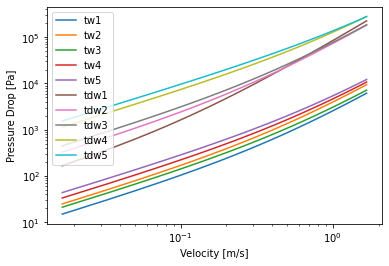

In [130]:
df_water_twilled.plot(loglog=True,xlabel='Velocity [m/s]', ylabel='Pressure Drop [Pa]')

<AxesSubplot:xlabel='Velocity [m/s]', ylabel='Pressure Drop [Pa]'>

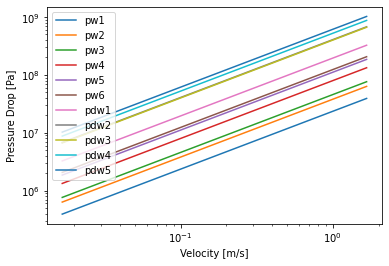

In [131]:
df_resin_plain.plot(loglog=True,xlabel='Velocity [m/s]', ylabel='Pressure Drop [Pa]')

<AxesSubplot:xlabel='Velocity [m/s]', ylabel='Pressure Drop [Pa]'>

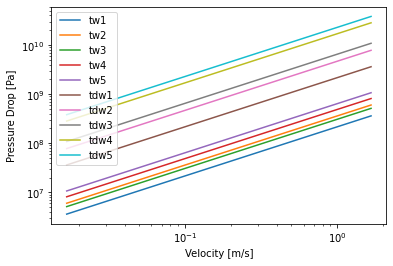

In [132]:
df_resin_twilled.plot(loglog=True,xlabel='Velocity [m/s]', ylabel='Pressure Drop [Pa]')